In [6]:
!wget http://optipng.sourceforge.net/pngtech/img/lena.png lena.png

--2020-05-10 00:11:52--  http://optipng.sourceforge.net/pngtech/img/lena.png
optipng.sourceforge.net (optipng.sourceforge.net) をDNSに問いあわせています... 216.105.38.10
optipng.sourceforge.net (optipng.sourceforge.net)|216.105.38.10|:80 に接続しています...接続しました。
HTTP による接続要求を送信しました、応答を待っています...200 OK
長さ: 473831 (463K) [image/png]
`lena.png' に保存中

lena.png            100%[===================>] 462.73K   477KB/s 時間 1.0s     

2020-05-10 00:11:53 (477 KB/s) - `lena.png' へ保存完了 [473831/473831]

--2020-05-10 00:11:53--  http://lena.png/
lena.png (lena.png) をDNSに問いあわせています...失敗しました: nodename nor servname provided, or not known.
wget: ホストアドレス `lena.png' を解決できませんでした。
終了しました --2020-05-10 00:11:53--
経過時間: 1.3s
ダウンロード完了: 1 ファイル、463K バイトを 1.0s で取得 (477 KB/s)


In [7]:
import cv2

def mosaic(img, rect, size):
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    r = img[y1:y2, x1:x2]
    s = cv2.resize(r, (size, size))
    m = cv2.resize(s, (w, h), interpolation=cv2.INTER_AREA)
    img2 = img.copy()
    img2[y1:y2, x1:x2] = m
    return img2

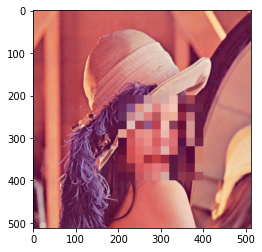

In [8]:
import matplotlib.pyplot as plt

img = cv2.imread('lena.png')
mos = mosaic(img, (200, 200, 400, 400), 10)

plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

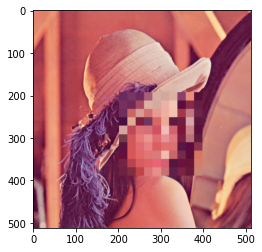

In [9]:
cascade = cv2.CascadeClassifier('./haarcascade_frontalface_alt.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(gray, minSize=(150, 150))
for (x, y, w, h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
from scipy import ndimage

img = cv2.imread('lena.png')

def face_detect(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(gray, minSize=(150, 150))
    for (x, y, w, h) in face_list:
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), thickness=10)

for i in range(0, 9):
    angle = i * 10
    img_r = ndimage.rotate(img, angle)
    face_detect(img_r)
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.title(f'angle={angle}')
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()